/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------------------------------
Migration Probability = 0.0
Expected Ratio:  0.75

Number of Star simulations:  0
Median Ratio:  nan

Number of Circle simulations:  0
Median Ratio:  nan
------------------------------------------------------------------------------------------------------------
Migration Probability = 0.05
Expected Ratio:  0.75

Number of Star simulations:  500
Median Ratio:  0.8078121166219638

Number of Circle simulations:  500
Median Ratio:  0.854982008926542
------------------------------------------------------------------------------------------------------------
Migration Probability = 0.1
Expected Ratio:  0.75

Number of Star simulations:  500
Median Ratio:  0.7879186385743957

Number of Circle simulations:  500
Median Ratio:  0.810181803496076
------------------------------------------------------------------------------------------------------------
Migration Probability = 0.15
Expect

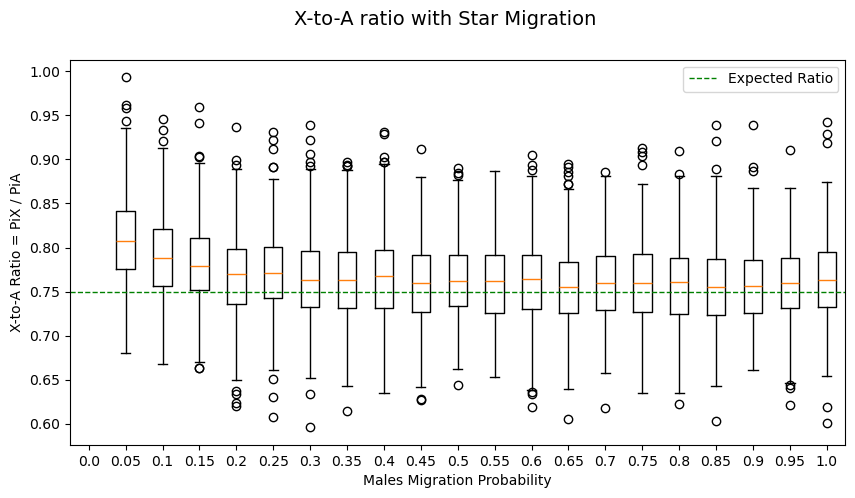

------------------------------------------------------------------------------------------------------------
Circle Migration



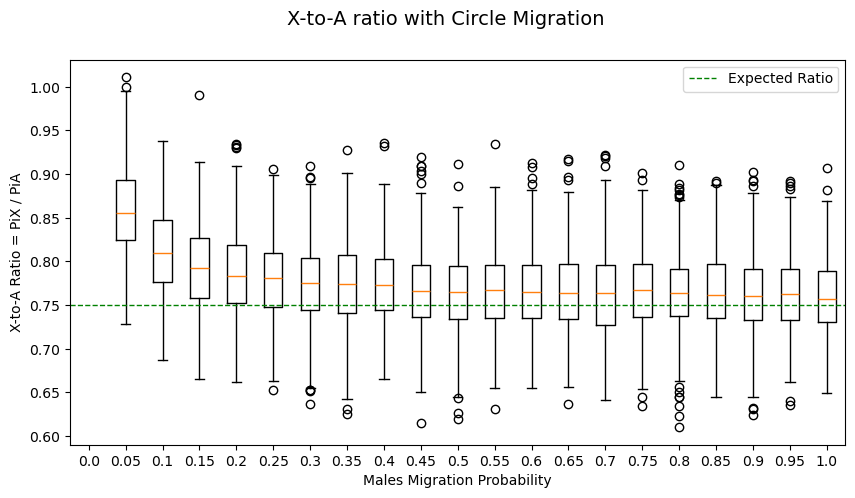

In [1]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWFV_MigV2_subpop/"

Prob_Mig = [0.0]+[k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)

for pmig in Prob_Mig:
    Star = []
    Circle = []
    for NUM in range(1,501):
        File = FOLDER+"NWF_subpop_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 30:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                Star.append(np.mean(PiX)/np.mean(PiA))
            Text.close()
            
        File = FOLDER+"NWF_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 30:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                Circle.append(np.mean(PiX)/np.mean(PiA))
            Text.close()
    
    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    print("------------------------------------------------------------------------------------------------------------")
    print("Migration Probability = "+str(pmig))
    print("Expected Ratio: ",expected_ratio)
    print()
    print("Number of Star simulations: ",len(Star))
    print("Median Ratio: ",Star_median)
    print()
    print("Number of Circle simulations: ",len(Circle))
    print("Median Ratio: ",Circle_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Star Migration", fontsize=14)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Circle Migration", fontsize=14)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.legend() 

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()